In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [235]:
sns.set_context("poster")

In [236]:
# folder='Tests_FGADR/'
# folder='Tests_IDRID/'
folder='Tests_Retinal_lesions/'
# folder='Tests_kaggle/'
# folder='Tests_Hiper/'

In [237]:
test_name='loss_log_server_Test_122_retinal'
# test_name='loss_log_server_Test_34_IDRiD'
# test_name='loss_log_server_Test_9_FGADR'
# test_name='loss_log_pclab_Test_3_Hyper'

In [238]:
df=pd.read_csv(folder+test_name+'.csv')

In [239]:
df.head

<bound method NDFrame.head of          Epoch  Generator Loss  Discriminator Loss 1  Discriminator Loss 2  \
0            1       158.31438           3624.129600             -0.344045   
1            2       117.19961            667.165340             -0.275424   
2            3       151.03404            241.662050             -0.217681   
3            4        70.75015            222.590100             -0.216970   
4            5        71.66422            107.590760             -0.216853   
...        ...             ...                   ...                   ...   
134795  134796      -170.86441             -0.104974           -233.856720   
134796  134797      -211.86120             -0.127662           -233.880080   
134797  134798      -192.01524             -0.097022           -233.889020   
134798  134799      -213.05365             -0.085637           -234.066220   
134799  134800      -201.07793             -0.053044           -233.831300   

        Adversarial Loss   TV los

In [240]:
df['Epoch']=df['Epoch']/(df['Epoch'].max()/400)

In [241]:
df['Discriminator Loss 1'].min(),df['Discriminator Loss 1'].max()

(-0.62154186, 3624.1296)

In [242]:
# df.drop(df[df['Discriminator Loss 1']>7].index,inplace=True)

In [243]:
# df.drop(df[df['Discriminator Loss 2']>2].index,inplace=True)

In [244]:
# df['Discriminator Loss 1'].mean(),df['Discriminator Loss 2'].mean()

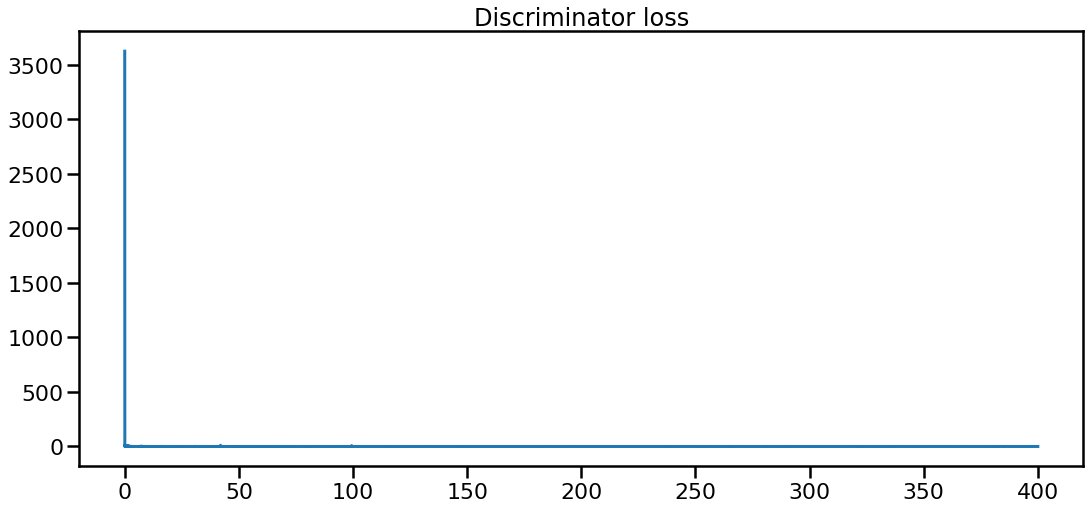

In [245]:
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
plt.plot(df['Epoch'],df['Discriminator Loss 1'])
plt.title('Discriminator loss')
plt.savefig(folder+'loss_disc_'+test_name+'.png')

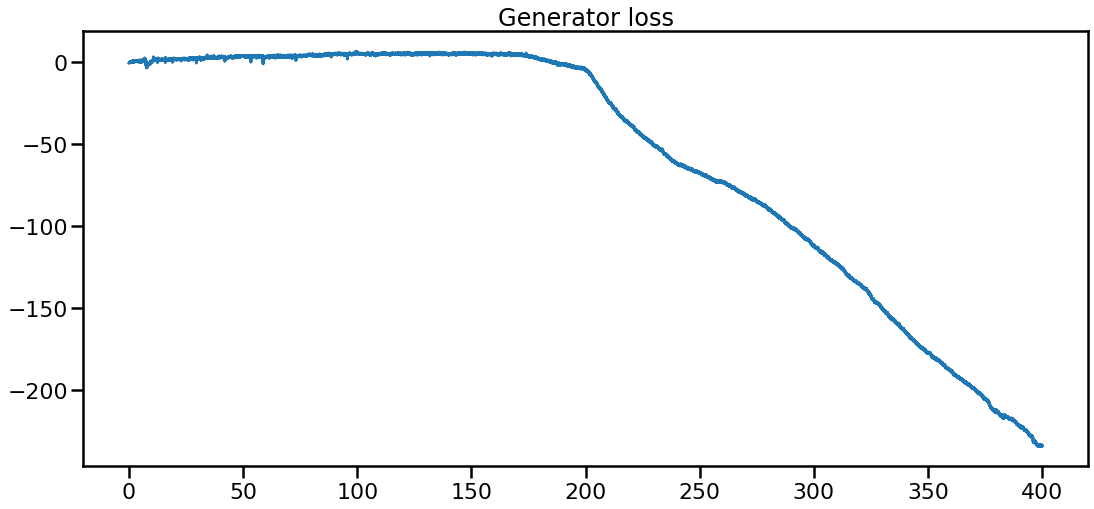

In [246]:
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
plt.plot(df['Epoch'],df['Discriminator Loss 2'])
plt.title('Generator loss')
plt.savefig(folder+'loss_gen_loss_'+test_name+'.png')


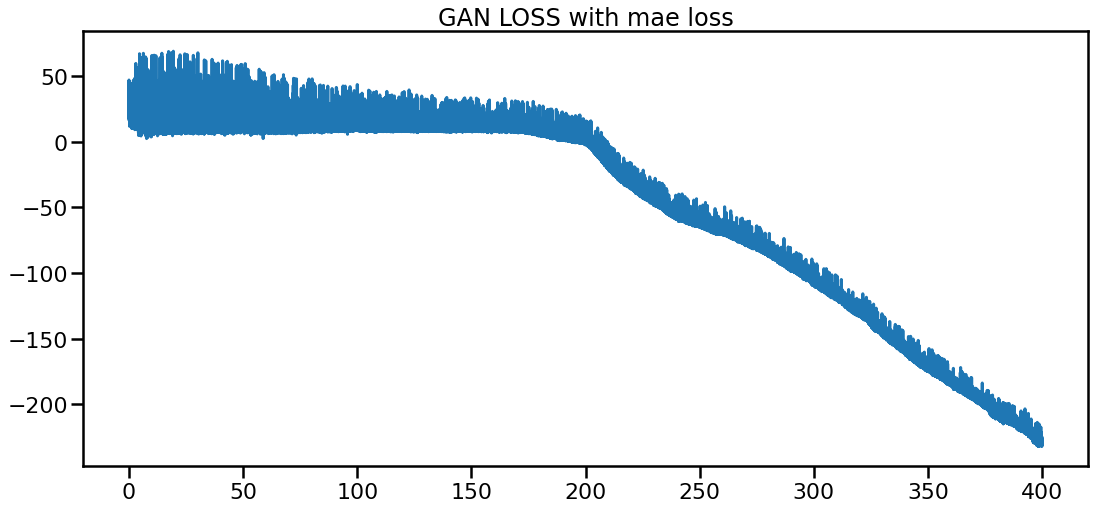

In [247]:
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
plt.plot(df['Epoch'],(df['Discriminator Loss 2']+df['MAE loss']*100))
plt.title('GAN LOSS with mae loss')
plt.savefig(folder+'loss_disc_average_'+test_name+'.png')

# plt.savefig('loss_disc.png')

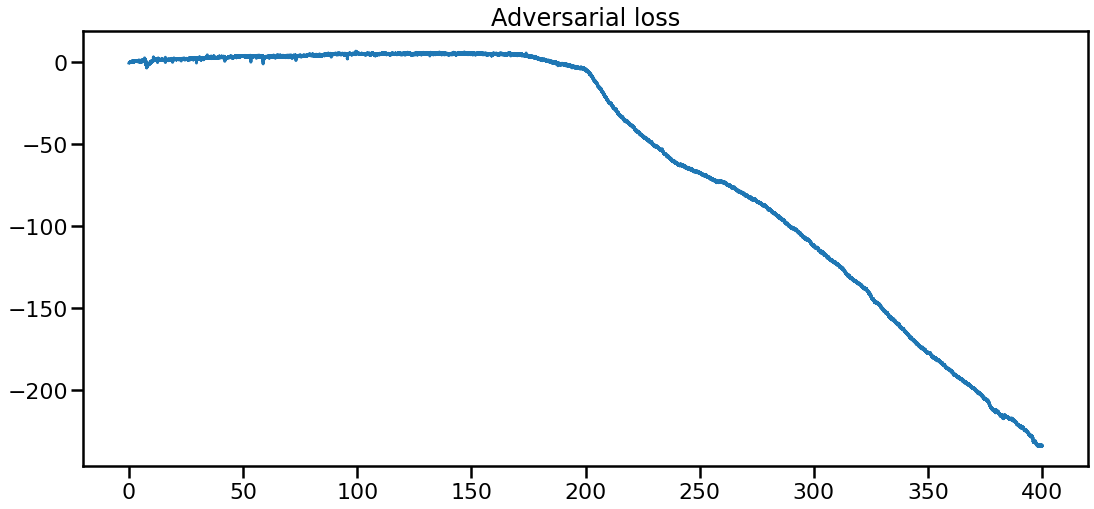

In [248]:
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
plt.plot(df['Epoch'],df['Adversarial Loss'])
plt.title('Adversarial loss')
plt.savefig(folder+'loss_Adversarial_Loss_'+test_name+'.png')

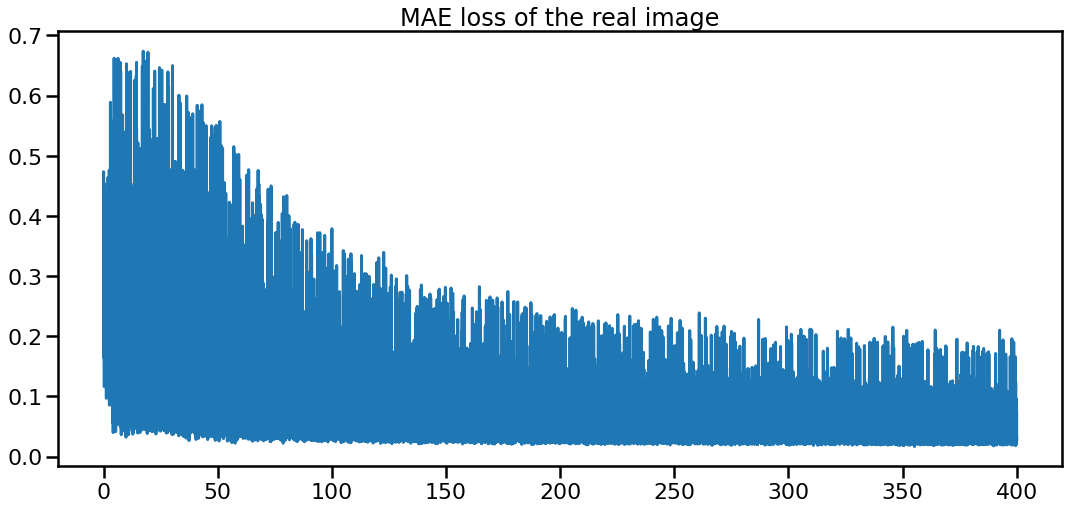

In [249]:
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
plt.plot(df['Epoch'],df['MAE loss'])
plt.title('MAE loss of the real image')
plt.savefig(folder+'loss_MAE_'+test_name+'.png')

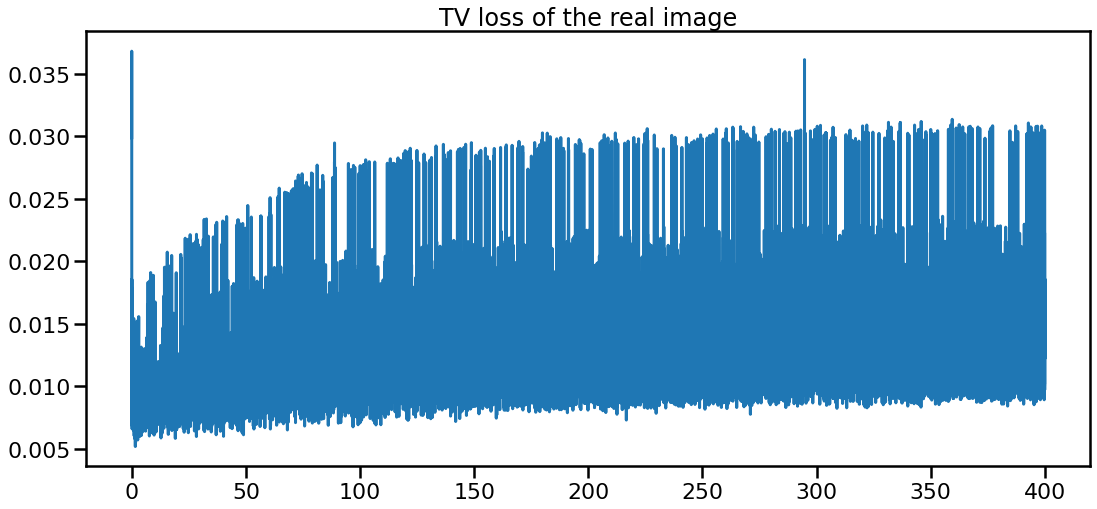

In [250]:
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
plt.plot(df['Epoch'],df['TV loss'])
plt.title('TV loss of the real image')
plt.savefig(folder+'loss_TV_'+test_name+'.png')

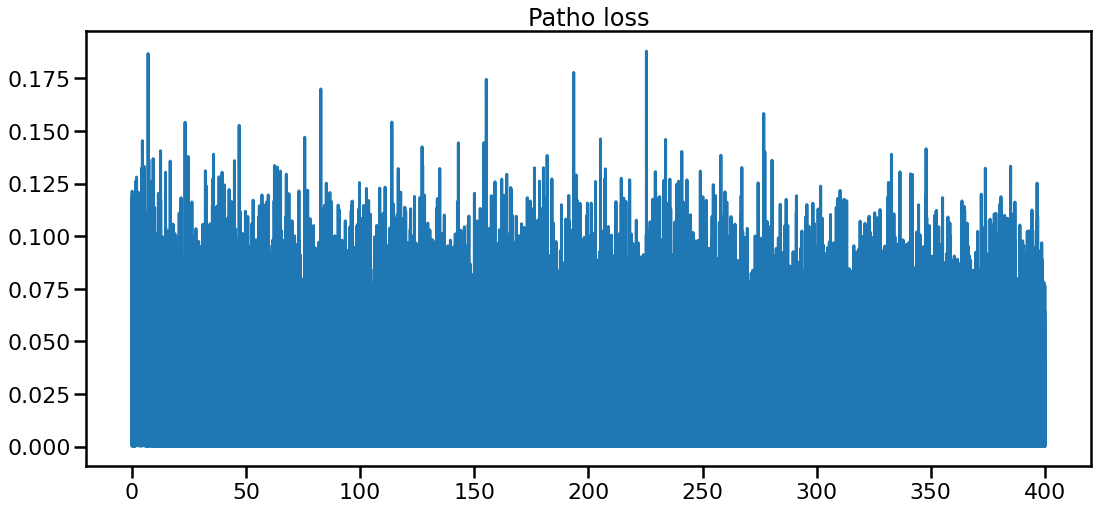

In [251]:
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
plt.plot(df['Epoch'],df['Patho Loss'])
plt.title('Patho loss')
plt.savefig(folder+'loss_Patho_'+test_name+'.png')

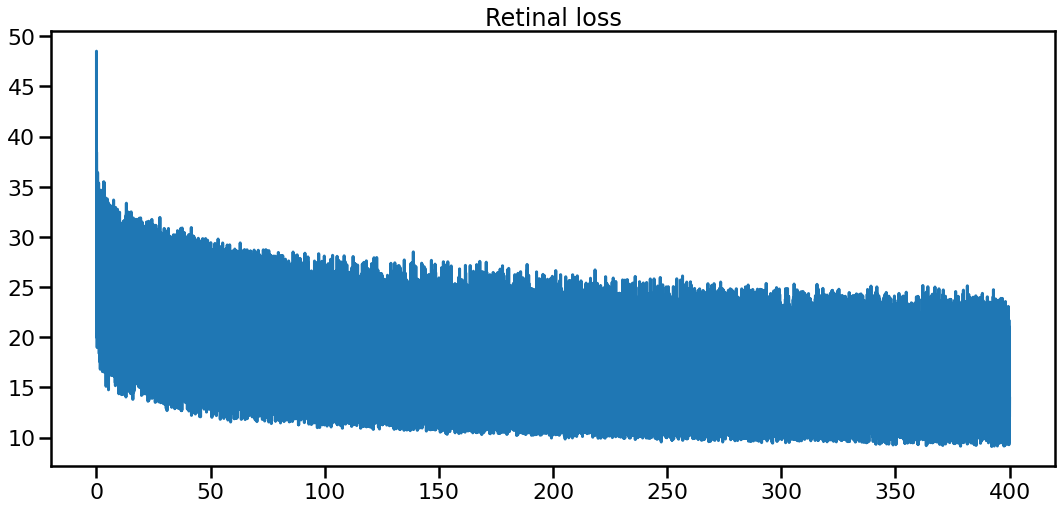

In [252]:
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
plt.plot(df['Epoch'],df['Retinal Loss'])
plt.title('Retinal loss')
plt.savefig(folder+'loss_Retinal_'+test_name+'.png')

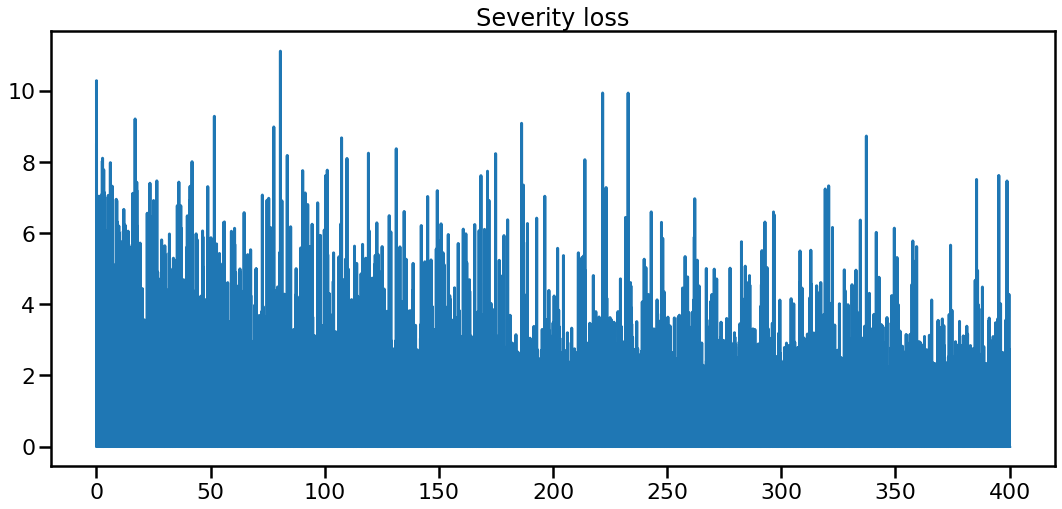

In [253]:
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
plt.plot(df['Epoch'],df['Severity loss'])
plt.title('Severity loss')
plt.savefig(folder+'loss_Severity_'+test_name+'.png')

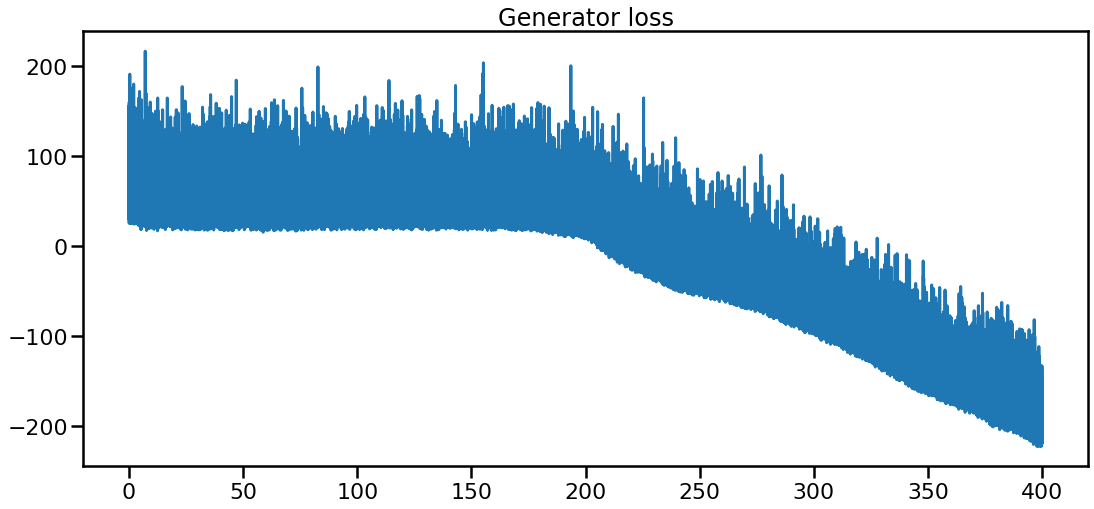

In [254]:
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
plt.plot(df['Epoch'],df['Generator Loss'], label='Gen Loss')
plt.title('Generator loss')
plt.savefig(folder+'loss_Gen_'+test_name+'.png')

# plt.savefig('loss_gan.png')

In [255]:
print(df['Generator Loss'].min(),
df['Generator Loss'].max(),
df['Generator Loss'].mean(),
df['Generator Loss'].std())

-222.21883 216.26825 -20.948189508873895 81.25345721293957


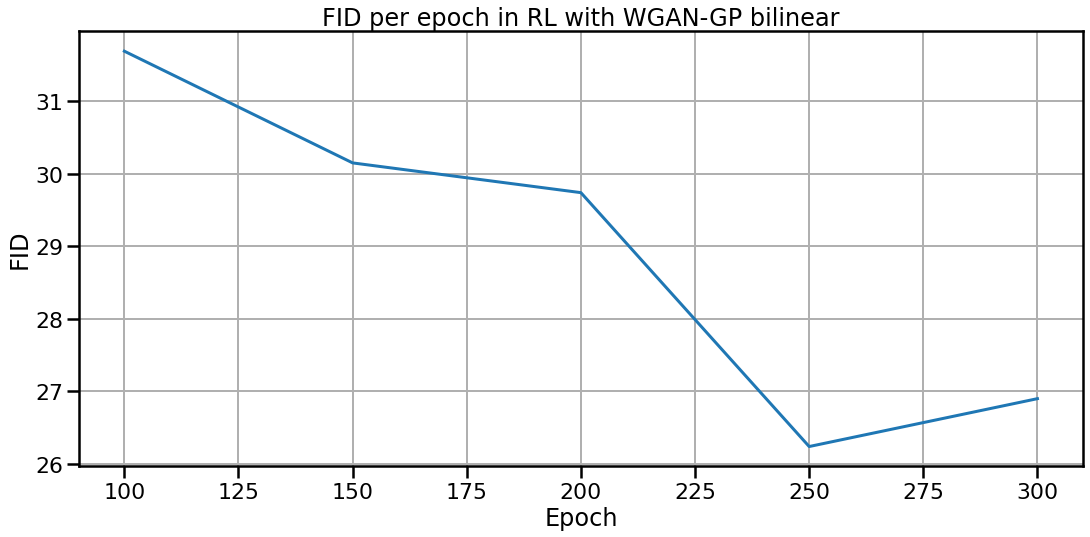

In [263]:
data=np.loadtxt('fids_122_rl.csv',delimiter=',')
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
plt.plot(data.transpose()[0],data.transpose()[1])
plt.title('FID per epoch in RL with WGAN-GP bilinear+antialias')
plt.grid('on')
plt.xlabel('Epoch')
plt.ylabel('FID')
plt.savefig(folder+'FID_122_rl.png')

# plt.savefig('loss_disc.png')

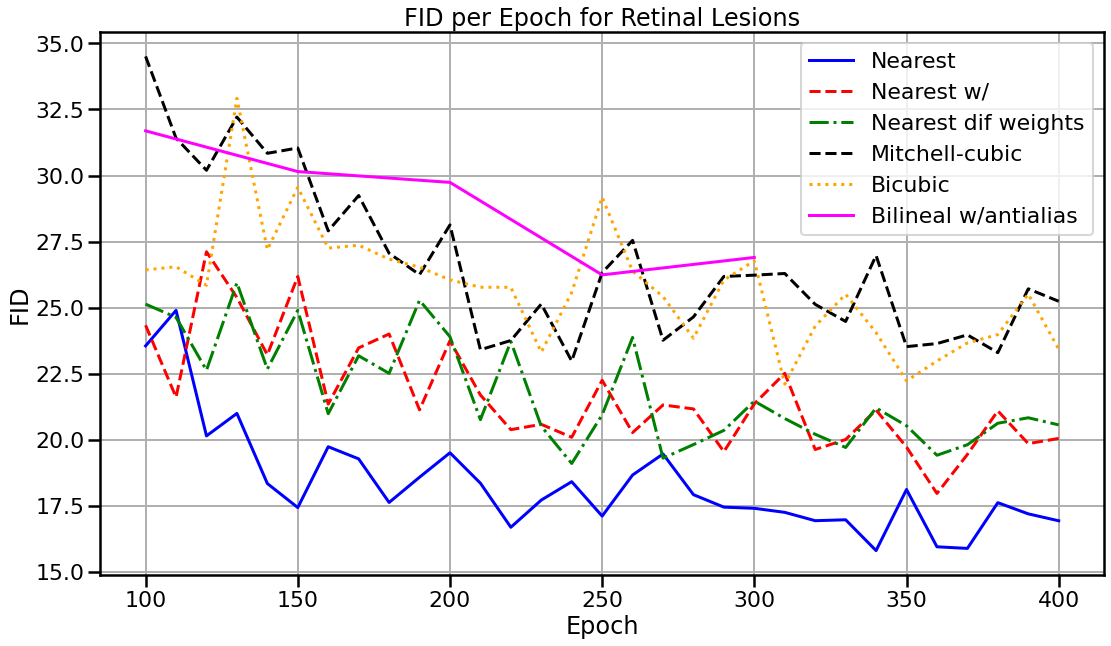

In [265]:
import numpy as np
import matplotlib.pyplot as plt

# Load the first dataset
data1 = np.loadtxt('fids_133_rl.csv', delimiter=',')

# Load the second dataset (assuming it is in the same format)
data2 = np.loadtxt('fids_132_rl.csv', delimiter=',')  # Change the filename as needed
data3=np.loadtxt('fids_130_rl.csv',delimiter=',')
data4=np.loadtxt('fids_127_rl.csv',delimiter=',')
data5=np.loadtxt('fids_126_rl.csv',delimiter=',')
data6=np.loadtxt('fids_122_rl.csv',delimiter=',')

# Create the figure
plt.figure(figsize=(18, 10))  # Adjust the figure size as needed

# Plot the first dataset
plt.plot(data1.transpose()[0], data1.transpose()[1], label='Nearest', color='blue')

# Plot the second dataset
plt.plot(data2.transpose()[0], data2.transpose()[1], label='Nearest w/ ', color='red', linestyle='--')
plt.plot(data3.transpose()[0], data3.transpose()[1], label='Nearest dif weights', color='green', linestyle='-.')

plt.plot(data4.transpose()[0], data4.transpose()[1], label='Mitchell-cubic', color='black', linestyle='--')
plt.plot(data5.transpose()[0], data5.transpose()[1], label='Bicubic', color='orange', linestyle=':')
plt.plot(data6.transpose()[0], data6.transpose()[1], label='Bilineal w/antialias', color='magenta', linestyle='-')

# Customize the plot
plt.title('FID per Epoch for Retinal Lesions')
plt.grid('on')
plt.xlabel('Epoch')
plt.ylabel('FID')
plt.legend()  # Add legend to distinguish the graphs

# Save the figure
plt.savefig('FID_combined_rl.png')  # Change the filename as needed

# Display the plot
plt.show()


In [258]:
# data=np.loadtxt('fids_38_IDRID.csv',delimiter=',')
# plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
# plt.plot(data.transpose()[0]*10,data.transpose()[1])
# plt.title('FID per epoch exp 39_IDRID')
# plt.grid('on')
# plt.xlabel('Epoch')
# plt.ylabel('FID')
# plt.savefig('FID_39_IDRID.png')

# # plt.savefig('loss_disc.png')

In [259]:
# data=np.loadtxt('fids_20_FGADR.csv',delimiter=',')
# plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
# plt.plot(data.transpose()[0],data.transpose()[1])
# plt.title('FID per epoch exp 20_FGADR')
# plt.grid('on')
# plt.xlabel('Epoch')
# plt.ylabel('FID')
# plt.savefig('FID_20_FGADR.png')

# # plt.savefig('loss_disc.png')

In [260]:
# data=np.loadtxt('fids_RFMID.csv',delimiter=',')
# plt.figure(figsize=(18, 8))  # Adjust the figure size as needed
# plt.plot(data.transpose()[0],data.transpose()[1])
# plt.title('FID per epoch exp 1 RFMID')
# plt.grid('on')
# plt.xlabel('Epoch')
# plt.ylabel('FID')
# plt.savefig('FID_1_RFMID.png')

# # plt.savefig('loss_disc.png')